Hope Knopf - MSBA Summer 2018
Data Analytics Programming
Assignment 2

In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib



In [3]:
file = open('NYC_Restaurants.csv', 'r')

In [4]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)
#Reading in the data

In [5]:
print df

      Unnamed: 0     CAMIS                                   DBA       BORO  \
0              0  30112340                               WENDY'S   BROOKLYN   
1              1  30112340                               WENDY'S   BROOKLYN   
2              2  30112340                               WENDY'S   BROOKLYN   
3              3  30112340                               WENDY'S   BROOKLYN   
4              4  30112340                               WENDY'S   BROOKLYN   
5              5  40356068                    TOV KOSHER KITCHEN     QUEENS   
6              6  40356068                    TOV KOSHER KITCHEN     QUEENS   
7              7  40356068                    TOV KOSHER KITCHEN     QUEENS   
8              8  40356068                    TOV KOSHER KITCHEN     QUEENS   
9              9  40356151               BRUNOS ON THE BOULEVARD     QUEENS   
10            10  40356151               BRUNOS ON THE BOULEVARD     QUEENS   
11            11  40356151               BRUNOS ON T

In [5]:
file.close()

Q1

In [6]:
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE']  
#Combining columns into a new column of the dataframe, named RESTAURANT
print df['RESTAURANT'][0:10]

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


Q2 

In [7]:
total_restaurants = df['RESTAURANT'].drop_duplicates()    #taking out duplicate entries of restaurants
 
print 'Total number of restaurants included in data is', len(total_restaurants)

#There are 10,114 restaurants included in this data

Total number of restaurants included in data is 10114


 Q3
 

In [8]:
names_addresses= df[['DBA','RESTAURANT']].drop_duplicates()      #dropping duplicate entries for the same address
names_addresses

freq=names_addresses['DBA'].value_counts()   #frequencies of each restaurant name
mask = (freq>1)     #masking for restaurants that have more than 1 location in NY
chain=freq[mask]


In [9]:

print 'Total number of restaurant chains included in the data is', len(chain)

Total number of restaurant chains included in the data is 368


Q4

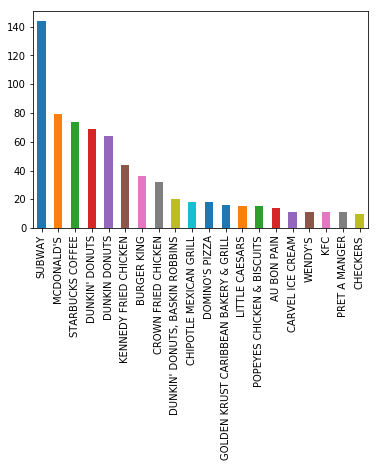

In [10]:


most_pop_chains = chain[:20]      #top 20 from chain variable in Q3
most_pop_chains.plot(kind='bar')   #plot a bar graph 



Q5

In [11]:
#divide the # of chains by the # of total restauarants, need float for decimals 

print "The fraction of all restaurants that are chains is", str(float(sum(chain))/float(len(total_restaurants)))




The fraction of all restaurants that are chains is 0.164722167293


Q6

In [30]:
freq=names_addresses['DBA'].value_counts()       #value count gives number of each restauarant name
mask = (freq==1)    #masking for restaurants that have only 1 locations, so non-chain 
non_chain=freq[mask]   #apply mask to the value count of all restuarants


In [31]:
non_chain
len(non_chain)
#double checking # of non-chain restaurants 

8448

In [32]:
import matplotlib.pyplot as plt

mask1 = (df['BORO']=='Missing')
df.loc[mask1, 'BORO'] = np.nan
#get rid of the missing boro rows 

#create a function to find values in non_chain list 
def non_chain_DBA(x):
    return x in non_chain
mask2=df['DBA'].map(non_chain_DBA)

non_chain_2=df[mask2].drop_duplicates(subset='RESTAURANT')
#applying mask & dropping duplicate locations 

non_chain_boro = non_chain_2['BORO'].value_counts()
#value count to find # of non chains in each boro

print non_chain_boro


MANHATTAN        3323
BROOKLYN         2180
QUEENS           1968
BRONX             659
STATEN ISLAND     312
Name: BORO, dtype: int64


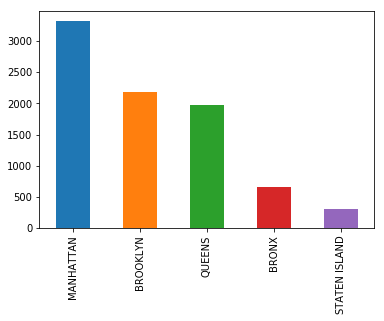

In [33]:
non_chain_boro.plot(kind='bar')
#plot in a bar graph 

Q7

In [34]:
rest_boro = df[['RESTAURANT', 'BORO']].drop_duplicates()
#create a table w/ restaurant and boro, drop duplicates

In [35]:
rest_boro_count = rest_boro['BORO'].value_counts()
#value count to find total # of restaurants per boro

In [36]:
rest_boro_count

MANHATTAN        4001
BROOKLYN         2529
QUEENS           2321
BRONX             855
STATEN ISLAND     394
Name: BORO, dtype: int64

In [37]:
non_chain_boro

MANHATTAN        3323
BROOKLYN         2180
QUEENS           1968
BRONX             659
STATEN ISLAND     312
Name: BORO, dtype: int64

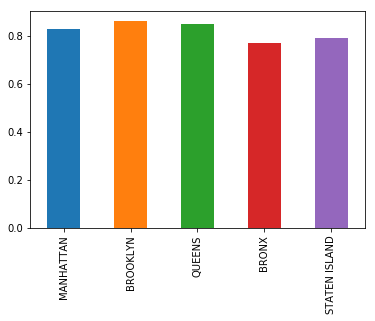

In [38]:
(non_chain_boro/rest_boro_count).plot(kind='bar')
#divide number of non-chains in each boro by total number of restaurants in boro 

Q8

In [39]:
cuisine_popularity = df[['CUISINE DESCRIPTION', 'RESTAURANT']].drop_duplicates()
#create a table w/ cuisine type and restaurant, drop duplicates

In [40]:
c_pop_values = cuisine_popularity['CUISINE DESCRIPTION'].value_counts()
#value count to find # of restaurants per cuisine type

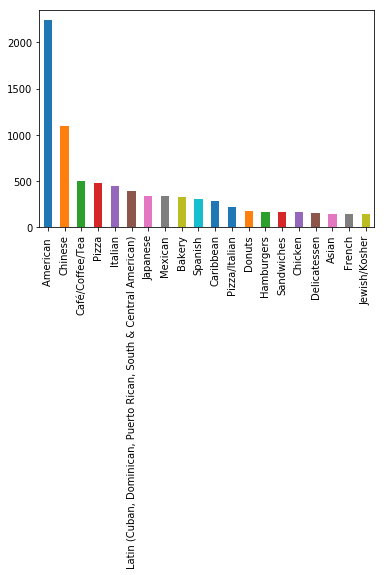

In [41]:
c_pop_values[:20].plot(kind='bar')
#plot the top 20 value counts of cuisine type

Q9

In [42]:
mask9 = df['VIOLATION CODE'].notnull()
violations = df[mask9]
#getting restaurants that had violations during an inspection

In [43]:
violations

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,...,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,AREA CODE,RESTAURANT
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,718,WENDY'S 469 FLATBUSH AVENUE 11225
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,718,WENDY'S 469 FLATBUSH AVENUE 11225
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,718,WENDY'S 469 FLATBUSH AVENUE 11225
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,718,WENDY'S 469 FLATBUSH AVENUE 11225
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,718,WENDY'S 469 FLATBUSH AVENUE 11225
5,5,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,02B,Hot food item not held at or above 140º F.,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,718,TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6,6,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,06A,Personal cleanliness inadequate. Outer garment...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,718,TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7,7,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,06C,Food not protected from potential source of co...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,718,TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8,8,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,10F,Non-food contact surface improperly constructe...,Not Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,718,TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9,9,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369,7183350505,American,11/15/2014,...,04L,Evidence of mice or live mice present in facil...,Critical,38,Z,11/15/2014,02/12/2015,Cycle Inspection / Re-inspection,718,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...


In [44]:
mask9a = df['VIOLATION CODE'].isnull()
no_violations = df[mask9a]
#getting restaurants that did not have violations during an inspection

In [45]:
no_violations

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,...,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,AREA CODE,RESTAURANT
30,30,40361521,GLORIOUS FOOD,MANHATTAN,522,EAST 74 STREET,10021,2127372140,American,11/24/2014,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,02/12/2015,Administrative Miscellaneous / Initial Inspection,212,GLORIOUS FOOD 522 EAST 74 STREET 10021
76,76,40364304,TEXAS ROTISSERIE,MANHATTAN,94,FULTON STREET,10038,2125666666,Chicken,12/10/2014,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,02/12/2015,Administrative Miscellaneous / Initial Inspection,212,TEXAS ROTISSERIE 94 FULTON STREET 10038
121,121,40365226,NOSTRAND DONUT SHOP,BROOKLYN,1449,NOSTRAND AVENUE,11226,7188263008,Donuts,11/19/2014,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,02/12/2015,Administrative Miscellaneous / Initial Inspection,718,NOSTRAND DONUT SHOP 1449 NOSTRAND AVENUE 11226
131,131,40365414,LE PERIGORD,MANHATTAN,405,EAST 52 STREET,10022,2127556244,French,11/20/2014,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,02/12/2015,Administrative Miscellaneous / Initial Inspection,212,LE PERIGORD 405 EAST 52 STREET 10022
143,143,40365592,KING YUM RESTAURANT,QUEENS,181-08,UNION TURNPIKE,11366,7183801918,Chinese,12/16/2014,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,02/12/2015,Administrative Miscellaneous / Initial Inspection,718,KING YUM RESTAURANT 181-08 UNION TURNPIKE 11366
180,180,40365968,NANCY WHISKEY PUB,MANHATTAN,1,LISPENARD STREET,10013,2122269943,American,11/12/2014,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,02/12/2015,Administrative Miscellaneous / Initial Inspection,212,NANCY WHISKEY PUB 1 LISPENARD STREET 10013
259,259,40367442,BUDDY'S WONDER BAR,STATEN ISLAND,17,HARRISON AVENUE,10302,7184429768,American,12/17/2014,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,02/12/2015,Administrative Miscellaneous / Initial Inspection,718,BUDDY'S WONDER BAR 17 HARRISON AVENUE 10302
365,365,40369895,P & K'S GRILL,BRONX,170,WEST 231 STREET,10463,3476207880,American,11/20/2014,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,02/12/2015,Administrative Miscellaneous / Initial Inspection,347,P & K'S GRILL 170 WEST 231 STREET 10463
381,381,40369983,THE DART INN,QUEENS,83-18,PARSONS BOULEVARD,11432,7182911894,American,12/31/2014,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,02/12/2015,Administrative Miscellaneous / Re-inspection,718,THE DART INN 83-18 PARSONS BOULEVARD 11432
444,444,40371454,WEST BANK CAFE,MANHATTAN,407,WEST 42 STREET,10036,2126956909,American,01/15/2015,...,NaN,NaN,Not Applicable,0,A,01/15/2015,02/12/2015,Cycle Inspection / Re-inspection,212,WEST BANK CAFE 407 WEST 42 STREET 10036


In [47]:
clean_res = no_violations[~no_violations['RESTAURANT'].isin(violations['RESTAURANT'])]
#finding restaurants that are only in no_violations, ie they never had violations
#this is controlling for restuarants that had no violations at some inspections but had a violation at some point

In [48]:
clean_pop = clean_res['CUISINE DESCRIPTION'].value_counts()
#value count to get # of restaurants in each cuisine type that have never had violations


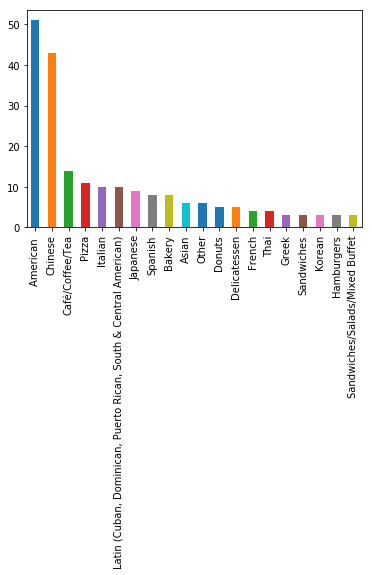

In [49]:
clean_pop[:20].plot(kind='bar')
#plot bar graph 

Q10

In [50]:

cuisines_greater_20 = c_pop_values[c_pop_values>=20]
cuisines_greater_20

#cuisines w/ greater than 20 restaurants 

American                                                            2238
Chinese                                                             1098
Café/Coffee/Tea                                                      498
Pizza                                                                483
Italian                                                              451
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     391
Japanese                                                             340
Mexican                                                              339
Bakery                                                               326
Spanish                                                              311
Caribbean                                                            287
Pizza/Italian                                                        217
Donuts                                                               176
Hamburgers                                         

In [51]:
cuisine_violations = clean_pop[c_pop_values>=20]
cuisine_violations

#cuisines w/restuarants that had no violations

American                                                            51
Chinese                                                             43
Café/Coffee/Tea                                                     14
Pizza                                                               11
Italian                                                             10
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    10
Japanese                                                             9
Spanish                                                              8
Bakery                                                               8
Asian                                                                6
Other                                                                6
Donuts                                                               5
Delicatessen                                                         5
French                                                               4
Thai  

In [52]:
cleanest = (cuisine_violations/cuisines_greater_20).sort_values(ascending=False)
cleanest[:10]

#divide number of clean restaurants by number of resaurants
#display top 10 percentages, ie the 10 cleanest cuisines 

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Greek                            0.054545
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.039162
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64

Q11

In [53]:

boro_violations = pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO'])
boro_violations
#making cross tab table w violation and boro 

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
VIOLATION DESCRIPTION,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16
"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",27,120,162,85,17
Ashtray present in smoke-free area.,4,4,5,8,1
"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.",20,93,168,80,10
"Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.",0,4,6,5,1


In [54]:
#find most common violation for each boro
boro_violations.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

Q12

In [55]:
 
violationFrequency=df['VIOLATION DESCRIPTION'].value_counts()
#value count to find overall frequencies of each violation type


In [57]:
boro_violations['ViolationFrequency']=violationFrequency
boro_violations
#creating table of violations 

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,ViolationFrequency
VIOLATION DESCRIPTION,,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5,135
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1,17
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8,240
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3,63
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16,303
"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",27,120,162,85,17,411
Ashtray present in smoke-free area.,4,4,5,8,1,22
"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.",20,93,168,80,10,371
"Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.",0,4,6,5,1,16


In [58]:
#created normalized table 
normalized_crosstab = boro_violations.div(boro_violations.ViolationFrequency, axis='index')
normalized_crosstab

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,ViolationFrequency
VIOLATION DESCRIPTION,,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",0.088889,0.296296,0.362963,0.214815,0.037037,1.0
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,0.058824,0.294118,0.352941,0.235294,0.058824,1.0
''''Wash hands sign not posted at hand wash facility.,0.087500,0.237500,0.387500,0.250000,0.033333,1.0
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",0.079365,0.190476,0.301587,0.380952,0.047619,1.0
Accurate thermometer not provided in refrigerated or hot holding equipment.,0.069307,0.250825,0.323432,0.303630,0.052805,1.0
"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",0.065693,0.291971,0.394161,0.206813,0.041363,1.0
Ashtray present in smoke-free area.,0.181818,0.181818,0.227273,0.363636,0.045455,1.0
"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.",0.053908,0.250674,0.452830,0.215633,0.026954,1.0
"Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.",0.000000,0.250000,0.375000,0.312500,0.062500,1.0


In [59]:
normalized_crosstab.idxmax()
#find most common violations after data is normalized

BORO
BRONX                                       Unprotected food re-served.
BROOKLYN              Precooked potentially hazardous food from comm...
MANHATTAN             Out-of package sale of tobacco products observed.
QUEENS                Caloric content range (minimum to maximum) not...
STATEN ISLAND         Eggs found dirty/cracked; liquid, frozen or po...
ViolationFrequency    Choking first aid poster not posted. Alcoho...
dtype: object

Q13

In [60]:
phones_zipcodes = df[['ZIPCODE', 'PHONE']]
phones_zipcodes

,ZIPCODE,PHONE
0,11225,7182875005
1,11225,7182875005
2,11225,7182875005
3,11225,7182875005
4,11225,7182875005
5,11374,7188967788
6,11374,7188967788
7,11374,7188967788
8,11374,7188967788
9,11369,7183350505


In [61]:

def split_phone(x):
    return str(x)[:3]
#create a function to take the first 3 numbers of a string of numbers 

In [62]:
df['AREA CODE'] = df['PHONE'].map(split_phone)
#apply function to phone column 

In [63]:
area_zip = df.groupby('AREA CODE').ZIPCODE.nunique()
number = str(len(area_zip[area_zip==1]))
#grouping the area code and zipcode and finding unique entries 

In [64]:
print 'The number of phone area codes that correspond to a single zipcode is ', number

The number of phone area codes that correspond to a single zipcode is  34


Q14

In [65]:
#add street type column
def split_function(n):
    return n.split()[-1]
df['STREET TYPE'] = df['STREET'].map(split_function)

In [66]:
#add street base column 
def split_function_2(n):
    return n.split()[0:-1]
df['STREET BASE'] = df['STREET'].map(split_function_2).apply(' '.join)

In [41]:
df

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,...,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225,AVENUE,FLATBUSH,FLATBUSH11225
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225,AVENUE,FLATBUSH,FLATBUSH11225
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225,AVENUE,FLATBUSH,FLATBUSH11225
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225,AVENUE,FLATBUSH,FLATBUSH11225
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225,AVENUE,FLATBUSH,FLATBUSH11225
5,5,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374,ROAD,63,6311374
6,6,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374,ROAD,63,6311374
7,7,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374,ROAD,63,6311374
8,8,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,Not Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374,ROAD,63,6311374
9,9,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369,7183350505,American,11/15/2014,...,Critical,38,Z,11/15/2014,02/12/2015,Cycle Inspection / Re-inspection,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...,BOULEVARD,ASTORIA,ASTORIA11369


In [67]:
#add street base & zip column
df['STREET BASE & ZIP'] = df['STREET BASE'] + df['ZIPCODE']

In [68]:
#make a new dataframe with 3 new columns
streets = df[['STREET TYPE' , 'STREET BASE' ,'STREET BASE & ZIP']]

#drop duplicates
streets = streets.drop_duplicates()
streets

,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,AVENUE,FLATBUSH,FLATBUSH11225
5,ROAD,63,6311374
9,BOULEVARD,ASTORIA,ASTORIA11369
16,AVENUE,SUTTER,SUTTER11208
22,HIGHWAY,KINGS,KINGS11223
24,AVENUE,CHURCH,CHURCH11218
26,AVENUE,3,311209
30,STREET,EAST 74,EAST 7410021
31,WEST,PROSPECT PARK,PROSPECT PARK11215
34,BROADWAY,,10003


In [69]:
#remove empty street base values 
streets_nonull = streets.replace('',np.nan)
streets_nonull=streets_nonull[streets_nonull['STREET BASE'].notnull()]
streets_nonull

,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,AVENUE,FLATBUSH,FLATBUSH11225
5,ROAD,63,6311374
9,BOULEVARD,ASTORIA,ASTORIA11369
16,AVENUE,SUTTER,SUTTER11208
22,HIGHWAY,KINGS,KINGS11223
24,AVENUE,CHURCH,CHURCH11218
26,AVENUE,3,311209
30,STREET,EAST 74,EAST 7410021
31,WEST,PROSPECT PARK,PROSPECT PARK11215
41,AVENUE,COLUMBUS,COLUMBUS10025


In [70]:
#merge dataframe with itself 
streets_merged=streets_nonull.merge(streets_nonull, left_on=['STREET BASE & ZIP'], right_on=[ 'STREET BASE & ZIP'], suffixes = ['_x','_y'])
streets_merged

,STREET TYPE_x,STREET BASE_x,STREET BASE & ZIP,STREET TYPE_y,STREET BASE_y
0,AVENUE,FLATBUSH,FLATBUSH11225,AVENUE,FLATBUSH
1,AVENUE,FLATBUSH,FLATBUSH11225,AVE,FLATBUSH
2,AVE,FLATBUSH,FLATBUSH11225,AVENUE,FLATBUSH
3,AVE,FLATBUSH,FLATBUSH11225,AVE,FLATBUSH
4,ROAD,63,6311374,ROAD,63
5,ROAD,63,6311374,DRIVE,63
6,DRIVE,63,6311374,ROAD,63
7,DRIVE,63,6311374,DRIVE,63
8,BOULEVARD,ASTORIA,ASTORIA11369,BOULEVARD,ASTORIA
9,AVENUE,SUTTER,SUTTER11208,AVENUE,SUTTER


In [71]:
#select rows where street types are different 
mask14=(streets_merged['STREET TYPE_x']!= streets_merged['STREET TYPE_y'])
streets_merged=streets_merged[mask14]
streets_merged

,STREET TYPE_x,STREET BASE_x,STREET BASE & ZIP,STREET TYPE_y,STREET BASE_y
1,AVENUE,FLATBUSH,FLATBUSH11225,AVE,FLATBUSH
2,AVE,FLATBUSH,FLATBUSH11225,AVENUE,FLATBUSH
5,ROAD,63,6311374,DRIVE,63
6,DRIVE,63,6311374,ROAD,63
12,AVENUE,CHURCH,CHURCH11218,AVE,CHURCH
13,AVE,CHURCH,CHURCH11218,AVENUE,CHURCH
18,WEST,PROSPECT PARK,PROSPECT PARK11215,W,PROSPECT PARK
19,W,PROSPECT PARK,PROSPECT PARK11215,WEST,PROSPECT PARK
22,AVENUE,COLUMBUS,COLUMBUS10025,AVE,COLUMBUS
23,AVE,COLUMBUS,COLUMBUS10025,AVENUE,COLUMBUS


In [72]:
#cross tab of two distinct street types
distinct_streets = pd.crosstab(streets_merged['STREET TYPE_x'], streets_merged['STREET TYPE_y'])
distinct_streets

STREET TYPE_y,A,AAVENUE,AIRPOR,AIRPORT,AVE,AVENUE,AVEUE,B,BLVD,BOULEARD,...,SW,TERMINAL,TPKE,TURNPIKE,U,V,W,WEST,X,Z
STREET TYPE_x,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
AAVENUE,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPOR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPORT,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVE,0,1,0,0,0,163,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVENUE,0,1,0,0,163,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVEUE,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BLVD,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#find most common street type
distinct_streets[['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']].idxmax()

STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object